<a href="https://colab.research.google.com/github/daclavi/se-ales-/blob/main/Copia_de_ejercicio1SyS2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a la programación - Señales y Sistemas

- ## [Librería numpy](https://numpy.org/) (señales digitales discretas)

- ## [Librería sympy](https://www.sympy.org/es/) (emular señales continuas)

In [ ]:
import numpy as np # importar libreria numpy
x = 30 #tipo int
y = 36.5 #tipo float

print(type(x),type(y)) #imprimir en pantalla

<class 'int'> <class 'float'>


# Arreglo de datos en numpy

- Señales en continuo

  $x(t) \in \mathbb{R}, \mathbb{C}$

  $t \in \mathbb{R}$

- Señales discretas

  $x[t_k] \in \mathbb{R}, \mathbb{C}$  

  $t \in \{t_0,t_1,\dots,t_{K-1}\}$; $K \in \mathbb{N}$ muestras

- Señales digitales

  $x[t_k] \in \{x_0,x_1,\dots,x_{P-1}\};$ $P\in \mathbb{N}$ estados según cantidad de bits del sistema de proceso

  $t \in \{t_0,t_1,\dots,t_{K-1}\}$; $K \in \mathbb{N}$ muestras

In [ ]:
xv = np.array([0,-2.5,10]) #crear array tipo vector
xv

array([ 0. , -2.5, 10. ])

# Listas vs numpy array

- Las listas pueden contener, números, strings, y en general objetos

- Los array de numpy están pensados para procesar números (matrices, tensores).

In [ ]:
xl = [0,-2,0.5] # no es señal digital -> lista de números
xl

[0, -2, 0.5]

In [ ]:
xl = ['andres marino',0.5, 2] #lista de tres elementos con un string, un flotante y un entero
xl

['andres marino', 0.5, 2]

# Tamaños, indexación y graficar numpy array

In [ ]:
xv.shape # vector con 3 elementos - > shape retorna la forma (tamaño del arreglo)

(3,)

In [ ]:
xm = np.array([[0,-2.5,10,4],[6,47,70,2],[8,10.2,-698,-0.9]]) #cada lista de números es tratada como una fila de la matriz
xm

array([[   0. ,   -2.5,   10. ,    4. ],
       [   6. ,   47. ,   70. ,    2. ],
       [   8. ,   10.2, -698. ,   -0.9]])

In [ ]:
xm.shape

(3, 4)

# En python se indexa desde 0

In [ ]:
xv = np.array([-6,5,4.2,3,8,50,16])
print(xv,xv.shape,xv[0])

[-6.   5.   4.2  3.   8.  50.  16. ] (7,) -6.0


# En Python, cuando se indexa por rangos de valores, no se incluye el último elemento

x[t_i,t_f)

In [ ]:
xv[1:5] # x[t_0] # no se incluye el elemento 5 que equivale a x[5] = 50

array([5. , 4.2, 3. , 8. ])

*Cuando se piden todos los elementos hasta el final con el operador : si se incluye el último elemento*

In [ ]:
# desde el segundo elemento hasta el ultimo
print(xv)
print(xv[1:])

[-6.   5.   4.2  3.   8.  50.  16. ]
[ 5.   4.2  3.   8.  50.  16. ]


In [ ]:
#desde antes del tercer elmento hasta el principio
print(xv)
print(xv[:3])

[-6.   5.   4.2  3.   8.  50.  16. ]
[-6.   5.   4.2]


# Para matrices se extiende la misma sintaxis para indexar vectores, pero separando la indexación por filas y por columnas

In [ ]:
print(xm)

[[   0.    -2.5   10.     4. ]
 [   6.    47.    70.     2. ]
 [   8.    10.2 -698.    -0.9]]


In [ ]:
xm[0:2,:2]

array([[ 0. , -2.5],
       [ 6. , 47. ]])

In [ ]:
xm[0:2,0]

array([0., 6.])

In [ ]:
xm[0,1:]

array([-2.5, 10. ,  4. ])

In [ ]:
np.diag(xm)#diagonal del arreglo (matriz)

array([   0.,   47., -698.])

# Simular cero y pendiente  para acondicionamiento de señales

- Se generará una función para emular el proceso de cero y pendiente en el acondicionamiento de señales.

- Las funciones principales para generar vectores equiespaciados son [linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html), [range](https://www.w3schools.com/python/ref_func_range.asp) y [arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html)

In [ ]:
# crear vector tiempo por rango y por número de muestras
K = 200 # número de muestras
ti = -15 # tiempo incial referencia [s]
tf = 10 # tieimpo final  [s]
# vector de tiempo equiespacioado
tv = np.linspace(start=ti,stop=tf,num=K)
print(tv)
print(tv.shape)
# tiempo muestreo se define según el rango de trabajo en segundos y la cantidad de muestras
Ts = (tf - ti)/K
print(Ts)

[-15.         -14.87437186 -14.74874372 -14.62311558 -14.49748744
 -14.3718593  -14.24623116 -14.12060302 -13.99497487 -13.86934673
 -13.74371859 -13.61809045 -13.49246231 -13.36683417 -13.24120603
 -13.11557789 -12.98994975 -12.86432161 -12.73869347 -12.61306533
 -12.48743719 -12.36180905 -12.2361809  -12.11055276 -11.98492462
 -11.85929648 -11.73366834 -11.6080402  -11.48241206 -11.35678392
 -11.23115578 -11.10552764 -10.9798995  -10.85427136 -10.72864322
 -10.60301508 -10.47738693 -10.35175879 -10.22613065 -10.10050251
  -9.97487437  -9.84924623  -9.72361809  -9.59798995  -9.47236181
  -9.34673367  -9.22110553  -9.09547739  -8.96984925  -8.84422111
  -8.71859296  -8.59296482  -8.46733668  -8.34170854  -8.2160804
  -8.09045226  -7.96482412  -7.83919598  -7.71356784  -7.5879397
  -7.46231156  -7.33668342  -7.21105528  -7.08542714  -6.95979899
  -6.83417085  -6.70854271  -6.58291457  -6.45728643  -6.33165829
  -6.20603015  -6.08040201  -5.95477387  -5.82914573  -5.70351759
  -5.5778894

In [ ]:
tv=np.arange(start=ti,stop=tf+Ts,step=Ts)
print(tv)

[-15.    -14.875 -14.75  -14.625 -14.5   -14.375 -14.25  -14.125 -14.
 -13.875 -13.75  -13.625 -13.5   -13.375 -13.25  -13.125 -13.    -12.875
 -12.75  -12.625 -12.5   -12.375 -12.25  -12.125 -12.    -11.875 -11.75
 -11.625 -11.5   -11.375 -11.25  -11.125 -11.    -10.875 -10.75  -10.625
 -10.5   -10.375 -10.25  -10.125 -10.     -9.875  -9.75   -9.625  -9.5
  -9.375  -9.25   -9.125  -9.     -8.875  -8.75   -8.625  -8.5    -8.375
  -8.25   -8.125  -8.     -7.875  -7.75   -7.625  -7.5    -7.375  -7.25
  -7.125  -7.     -6.875  -6.75   -6.625  -6.5    -6.375  -6.25   -6.125
  -6.     -5.875  -5.75   -5.625  -5.5    -5.375  -5.25   -5.125  -5.
  -4.875  -4.75   -4.625  -4.5    -4.375  -4.25   -4.125  -4.     -3.875
  -3.75   -3.625  -3.5    -3.375  -3.25   -3.125  -3.     -2.875  -2.75
  -2.625  -2.5    -2.375  -2.25   -2.125  -2.     -1.875  -1.75   -1.625
  -1.5    -1.375  -1.25   -1.125  -1.     -0.875  -0.75   -0.625  -0.5
  -0.375  -0.25   -0.125   0.      0.125   0.25    0.375   0.5  

- Supongamos la función cuadrática:

$x(t) = a t^2 + b;$

$\forall t \in [t_i,t_f]$

- Se pretende generar el proceso de discretización según:

$x[t_k] = a t_k^2 + b$





In [ ]:
#parámetros parabola
a = 4
b = -3
xv = a*(tv**2) + b # creamos parabola en tiempo discreto-> **  pontencia
print(xv)
print(xv.shape)

[ 8.970000e+02  8.820625e+02  8.672500e+02  8.525625e+02  8.380000e+02
  8.235625e+02  8.092500e+02  7.950625e+02  7.810000e+02  7.670625e+02
  7.532500e+02  7.395625e+02  7.260000e+02  7.125625e+02  6.992500e+02
  6.860625e+02  6.730000e+02  6.600625e+02  6.472500e+02  6.345625e+02
  6.220000e+02  6.095625e+02  5.972500e+02  5.850625e+02  5.730000e+02
  5.610625e+02  5.492500e+02  5.375625e+02  5.260000e+02  5.145625e+02
  5.032500e+02  4.920625e+02  4.810000e+02  4.700625e+02  4.592500e+02
  4.485625e+02  4.380000e+02  4.275625e+02  4.172500e+02  4.070625e+02
  3.970000e+02  3.870625e+02  3.772500e+02  3.675625e+02  3.580000e+02
  3.485625e+02  3.392500e+02  3.300625e+02  3.210000e+02  3.120625e+02
  3.032500e+02  2.945625e+02  2.860000e+02  2.775625e+02  2.692500e+02
  2.610625e+02  2.530000e+02  2.450625e+02  2.372500e+02  2.295625e+02
  2.220000e+02  2.145625e+02  2.072500e+02  2.000625e+02  1.930000e+02
  1.860625e+02  1.792500e+02  1.725625e+02  1.660000e+02  1.595625e+02
  1.53

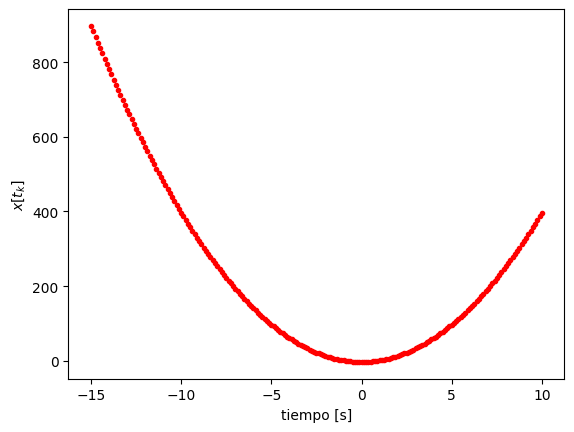

In [ ]:
import matplotlib.pyplot as plt #librería para gráficas básicas en python

plt.plot(tv,xv,'r.') #vector en eje horizontal, vector eje vertical, color y marcador
plt.xlabel('tiempo [s]')
plt.ylabel('$x[t_k]$') # $ $ ecuación latex
plt.show() #mostrar gráfica

## Cálculo de pendiente y del offset (cero)

$$ y[t_k] \in [y_{min},y_{max}]$$

$$y[t_k] = m x[t_k] + c$$

$$m = \frac{y_{max}-y_{min}}{x_{max}-x_{min}}$$

$$c = y[t_k] - m x[t_k]$$

- Se crea un código tipo función bajo el ambiente def, para generar el cero y pendiente según los valores $y_{max}$ y $y_{min}$ definidos por el usuario.

In [ ]:
y_min = 0 # valor min después de cero y pendiente
y_max = 5 # valor max después de cero y pendiente
#crear funcion en python
def my_ceropen(x,ymin = -5, ymax = 5): #en general se pueden definir valores por defecto
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv

In [ ]:
ymin = -3.3
ymax = 3.3
plt.plot(tv,xcp,c='r',label='cero y pendiente')
plt.legend
plt.show()




In [ ]:
yv = my_ceropen(xv,ymin=-15,ymax=20) #se llama la función definida en la celda anterior

In [ ]:
print(yv)
print(yv.shape)

[ 20.          19.41909722  18.84305556  18.271875    17.70555556
  17.14409722  16.5875      16.03576389  15.48888889  14.946875
  14.40972222  13.87743056  13.35        12.82743056  12.30972222
  11.796875    11.28888889  10.78576389  10.2875       9.79409722
   9.30555556   8.821875     8.34305556   7.86909722   7.4
   6.93576389   6.47638889   6.021875     5.57222222   5.12743056
   4.6875       4.25243056   3.82222222   3.396875     2.97638889
   2.56076389   2.15         1.74409722   1.34305556   0.946875
   0.55555556   0.16909722  -0.2125      -0.58923611  -0.96111111
  -1.328125    -1.69027778  -2.04756944  -2.4         -2.74756944
  -3.09027778  -3.428125    -3.76111111  -4.08923611  -4.4125
  -4.73090278  -5.04444444  -5.353125    -5.65694444  -5.95590278
  -6.25        -6.53923611  -6.82361111  -7.103125    -7.37777778
  -7.64756944  -7.9125      -8.17256944  -8.42777778  -8.678125
  -8.92361111  -9.16423611  -9.4         -9.63090278  -9.85694444
 -10.078125   -10.29444444 

- Se grafican la señal original y la señal acondicionada mediante [subplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html)

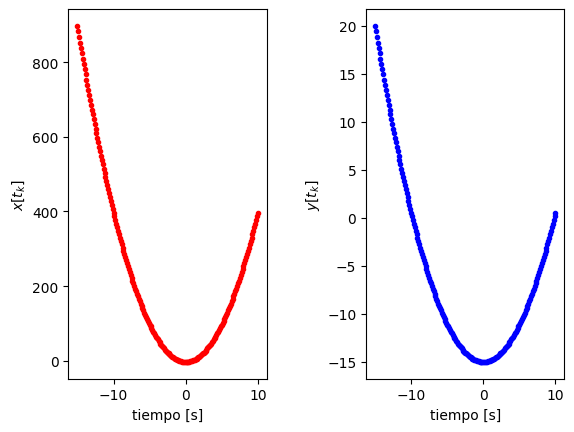

In [ ]:
plt.subplot(121) # 1 = #filas, 2 = #columnas, 1 = # dibujo
plt.plot(tv,xv,'r.')
plt.xlabel('tiempo [s]')
plt.ylabel('$x[t_k]$')

plt.subplot(122)
plt.plot(tv,yv,'b.')
plt.xlabel('tiempo [s]')
plt.ylabel('$y[t_k]$')
plt.subplots_adjust(hspace=0.5,wspace=0.5) #ajustar espaciado entre gráficas
plt.show()

Text(0, 0.5, '$x[t_k]$')

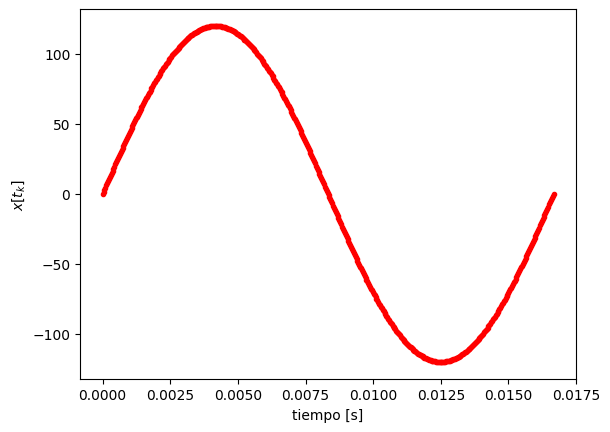

In [ ]:
plt.plot(tv,xv,'r.')
plt.xlabel('tiempo [s]')
plt.ylabel('$x[t_k]$')

- Se ilustra nuevamente el proceso de acondicionamiento cero y pendiente utilizando una función seno:

$$x[t_k] = A \sin[w_o t + \phi]$$

$$x[t_k] = A \sin[2 \pi F_o t] = A \sin[2 \pi t / T_o ]$$



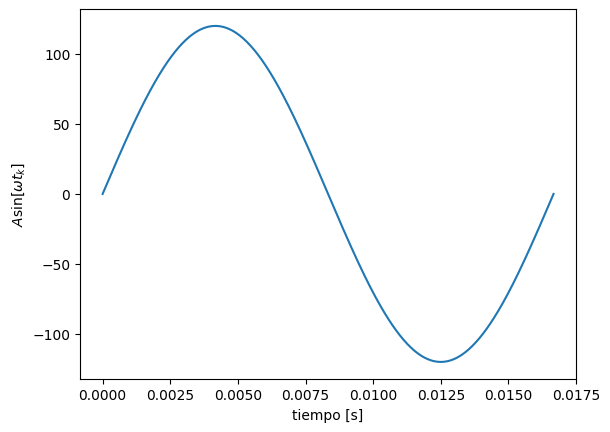

In [ ]:
K = 500 # número de muestras
T_o = 1/60 # periodo función sin
A = 120 # amplitud
ti = 0 #tiempo inicial
tf = T_o #tiempo final
tv = np.linspace(ti,tf,num=K) #vector de datos en tiempo
xv = A * np.sin(2*np.pi*tv/T_o) #vector de amplitud

plt.plot(tv,xv)
plt.xlabel('tiempo [s]')
plt.ylabel('$A\sin[\omega t_k]$')
plt.show()

In [ ]:
yv = my_ceropen(xv,ymin=0,ymax=5) #se utiliza la función ya creada de cero y pendiente

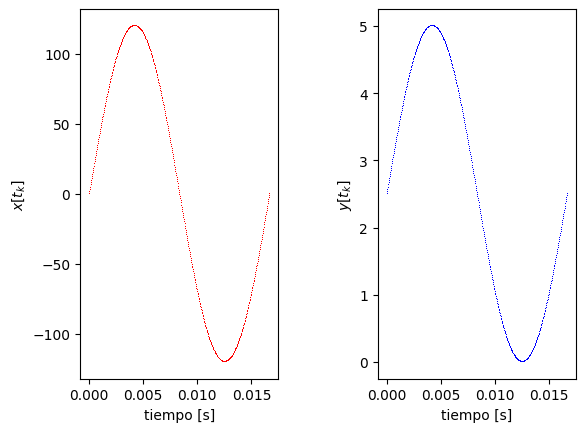

In [ ]:
plt.subplot(121) # 1 = #filas, 2 = #columnas, 1 = # dibujo
plt.plot(tv,xv,'r,')
plt.xlabel('tiempo [s]')
plt.ylabel('$x[t_k]$')

plt.subplot(122)
plt.plot(tv,yv,'b,')
plt.xlabel('tiempo [s]')
plt.ylabel('$y[t_k]$')
plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.show()

# Ejercicio:

- Después de acondicionar las señales ilustradas en el presente cuaderno, simule un proceso de discretización con $F_s \geq 2 F_o.$ Dibuje el resultado de la señal discretizada utilizando la función [stem](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.stem.html).

- Consultar el funcionamiento de los métodos [cdist](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html) y [argmin](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html).

- Realice una función mediante el ambiente def que permita realizar los procesos de discretización y cuantización (usando cdist y argmin) en cascada para un conversor análogo-digital de 3 bits con entrada análoga de 0 a 10 [v]. Presente las gráficas de la señal original, señal con cero y pendiente, señal discretizada, y señal digital.

**Ayuda para el ejercicio**: a continuación se presenta el funcionamiento de las funciones cdist y argmin

In [ ]:
#Ejemplo de señal despues de cero y pendiente y discretización
#Recuerde que el proceso de discretización debe ser implementado
from scipy.spatial.distance import cdist

#señal original
Fo = 60
To = 1/60
A = 120
Fs = 10*Fo #asegurar nyquist
Ts = 1/Fs
tv = np.arange(0,2*To,Ts)#procesar dos periodos discretizados
y = A*np.sin(2*np.pi*Fo*tv)

#cero y pendiente
ycs = my_ceropen(y, ymin=0,ymax=10)

#número de bits y vector de cuantización
nbits = 3
rmin = 0
rmax = 10
ve = np.linspace(rmin,rmax,2**nbits) # (rmax-rmin)/(2^#bits - 1) -> si se quiere incluir rmin y rmax

#distancias y cero pendiente a vector cuantizacion
d = cdist(ycs.reshape(-1,1),ve.reshape(-1,1)) #se utiliza reshape(-1,1) para generar vectores columna como lo pide cdist
d.shape # d es una matriz de 500 x 8, ej: la fila 1 incluye la distancia euclidea entre y[0] y los 8 elementos en ve

(20, 8)

In [ ]:
#se requiere identificar el elemento ve[j] más cercano a y[i] para genera señal cuantizada
ind = np.argmin(d,axis=1) #el parámetro axis = 1 indica que busca la posición a lo largo de las columnas del elemento más pequeño en cada fila
ind

array([3, 6, 7, 7, 6, 4, 1, 0, 0, 1, 3, 6, 7, 7, 6, 4, 1, 0, 0, 1])

In [ ]:
print(ycs[1],ind[1],ve[ind[1]]) # para y[50] = 0.58, el estado más cercano en ve es el elemento 1 que corresponde a ve[1]=0.71

8.090169943749473 6 8.571428571428571


Podemos crear una función de cuantización y evaluarla punto a punto a partir de cada muestra después de cero y spam discretizada

In [ ]:
#función cuantización punto a punto

def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]

In [ ]:
#recorrer vector cero y spam discretizado para cuantizar

for i in range(ycs.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(ycs[i],ve)
   else:
     yq = np.append(yq,my_cuantizador(ycs[i],ve)) #apilar datos cuantizando si i>0

ValueError: x and y must have same first dimension, but have shapes (500,) and (20,)

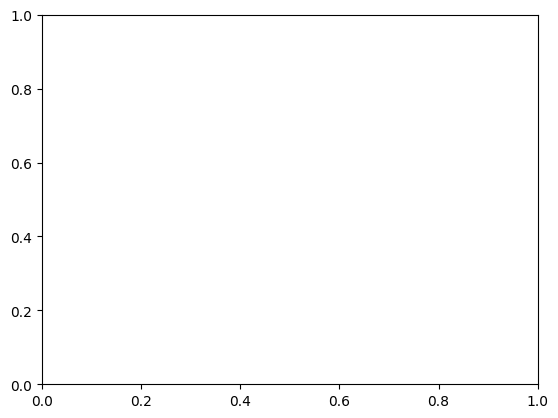

In [ ]:
#graficar señales

plt.plot(tv,ycs,c='r', label='ycs')#cs continua

plt.stem(tv,ycs, label='ycs_dis')#cs discreta

#estados de cuantización

for v in ve:
  plt.plot(tv,v*np.ones(len(tv)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(tv,yq,c='y',marker='o',label='ydig', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()

x(t) =200cos(100t)-50sen(200t+5),amplitud de -3.3 a 3.3

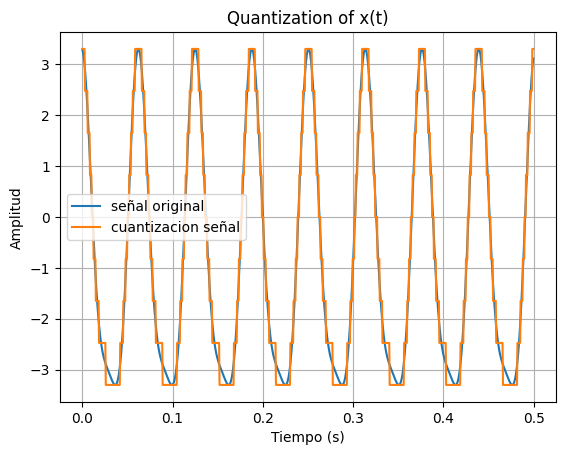

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#parametros
fs = 1000  # frecuencia
t = np.arange(0, 0.5, 0.5/fs)  # tiempo del vector
x = 200 * np.cos(100 * t) - 50 * np.sin(200 * t + 5)  # señal original

# escala de la señal
x_scaled = (x - np.min(x)) / (np.max(x) - np.min(x))
x_scaled = x_scaled * (3.3 - (-3.3)) + (-3.3)

#definir cuantizacion
def quantize(signal, levels):
  step_size = (np.max(signal) - np.min(signal)) / levels
  quantized_signal = np.round(signal / step_size) * step_size
  return quantized_signal

#niveles de cuantizacion
niveles = 8

# cuantizacion de la señal
x_quantized = quantize(x_scaled, niveles)

# Plot the original and quantized signals
plt.plot(t, x_scaled, label='señal original' )
plt.plot(t, x_quantized, label='cuantizacion señal')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Quantization of x(t)')
plt.legend()
plt.grid(True)
plt.show()

x(t) =200cos(100t)-50sen(200t+5),amplitud de -3.3 a 3.3
$np.pi/50$


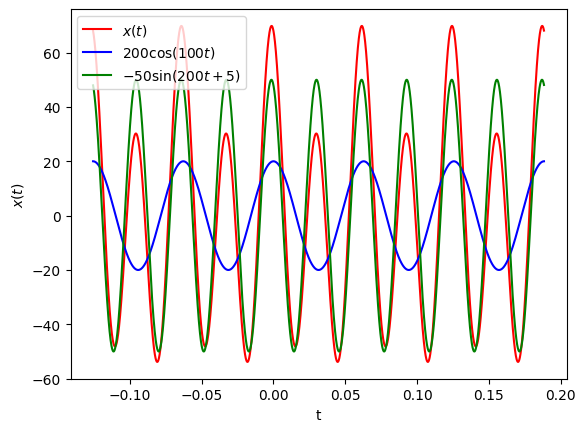

F1=157.07963267948966 F2=314.1592653589793 Fs=15707.963267948966 Hz


In [17]:
import numpy as np
import matplotlib.pyplot as plt


A1 = 20
A2 = 50
w1 = 100
w2 = 200
T1 = 2*np.pi/w1
T2 = 2*np.pi/w2
F1 = w1/2*np.pi
F2 = w2/2*np.pi
#definir freq muestreo según nyquist
Fs = 50*max(F1,F2)
# periodo señal cuasiperiodica T=mcm(T1,T2)
T = np.pi/50
#definir vector de tiempo
ti = - 2*T
tf = 3*T
tv = np.arange(ti,tf,1/Fs)
#costruir la señal
phi2 = 5
x = A1*np.cos(w1*tv)-50*np.sin(w2*tv+phi2)
xc = A1*np.cos(w1*tv)
xs= -A2*np.sin(w2*tv+phi2)
#plot
plt.plot (tv,x,'r', label = '$x(t)$')
plt.plot (tv,xc,'b', label = '$200\cos(100t)$')
plt.plot (tv,xs,'g', label = '$-50\sin(200t+5)$')
plt.legend()
plt.xlabel('t')
plt.ylabel('$x(t)$')
plt.show()

print(f'F1={F1} F2={F2} Fs={Fs} Hz')


$x(t)= cos (t/3) + cos (t/4)$
$T= 24pi$


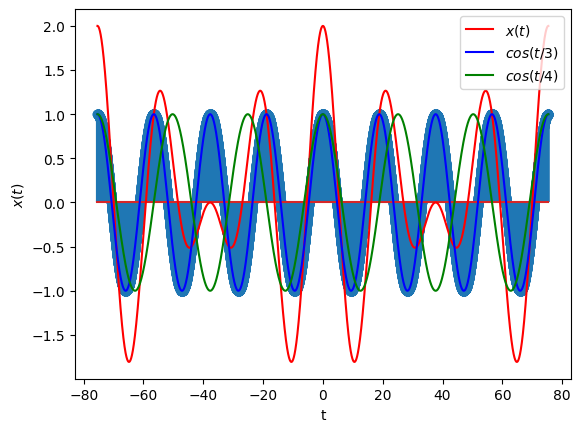

F1=0.5235987755982988 F2=0.39269908169872414 Fs=104.71975511965977 Hz


In [38]:
import numpy as np
import matplotlib.pyplot as plt

A1 = 1
A2 = 1
w1 = 1/3
w2 = 1/4
T1 = 2*np.pi/w1
T2 = 2*np.pi/w2
F1 = w1/2*np.pi
F2 = w2/2*np.pi
#definir freq muestreo según nyquist

Fs = 200*max(F1,F2)

# periodo señal cuasiperiodica T=mcm(T1,T2)

T = 24*np.pi

#definir vector de tiempo

ti = - 1*T
tf = 1*T
tv = np.arange(ti,tf,1/Fs)
#costruir la señal

phi2 = 0
x = A1*np.cos(w1*tv)+A2*np.cos(w2*tv)
xc = A1*np.cos(w1*tv)
xs = A2*np.cos(w2*tv+phi2)
#plot
plt.stem(tv,xc)
plt.plot (tv,x,'r', label = '$x(t)$')
plt.plot (tv,xc,'b', label = '$cos(t/3)$')
plt.plot (tv,xs,'g', label = '$ cos(t/4)$')

plt.legend()
plt.xlabel('t')
plt.ylabel('$x(t)$')
plt.show()

print(f'F1={F1} F2={F2} Fs={Fs} Hz')


In [43]:
y_min = 0 # valor min después de cero y pendiente
y_max = 5 # valor max después de cero y pendiente
#crear funcion en python
def my_ceropen(x,ymin = -5, ymax = 5): #en general se pueden definir valores por defecto
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv

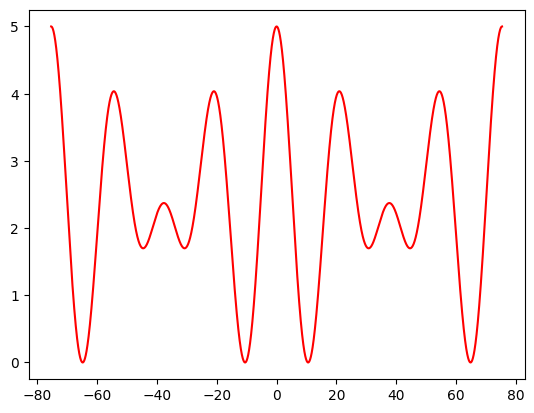

In [47]:
ymin = -3.3
ymax = 3.3
xcp = my_ceropen(x,ymin = y_min,ymax = y_max)
plt.plot(tv,xcp,c='r',label='cero_pendiente')
plt.legend
plt.show()

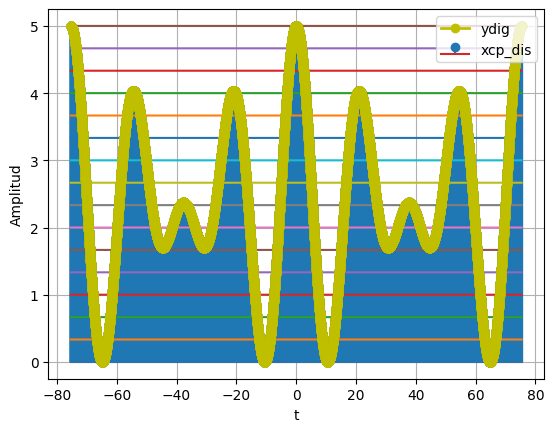

In [61]:
#cuantizar

nbits = 4
num_est = 2**nbits
vq = np.linspace(y_min,y_max,num_est)




def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]

  for i in range(xcp.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(xcp[i],vq)
   else:
     yq = np.append(yq,my_cuantizador(xcp[i],vq)) #apilar datos cuantizando si i>0

     plt.plot(tv,xcp,c='r', label='xcp')#cs continua

plt.stem(tv,xcp, label='xcp_dis')#cs discreta

#estados de cuantización

for v in vq:
  plt.plot(tv,v*np.ones(len(tv)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(tv,xcp,c='y',marker='o',label='ydig', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()